
<p style="background-color:purple; font-family:newtimeroman; color:#FFF9ED; font-size:200%; text-align:center; border-radius:20px; padding:20px;"><strong>Medical Text Dataset -Cancer Doc Sentiment Analysis and classification.</strong></p>


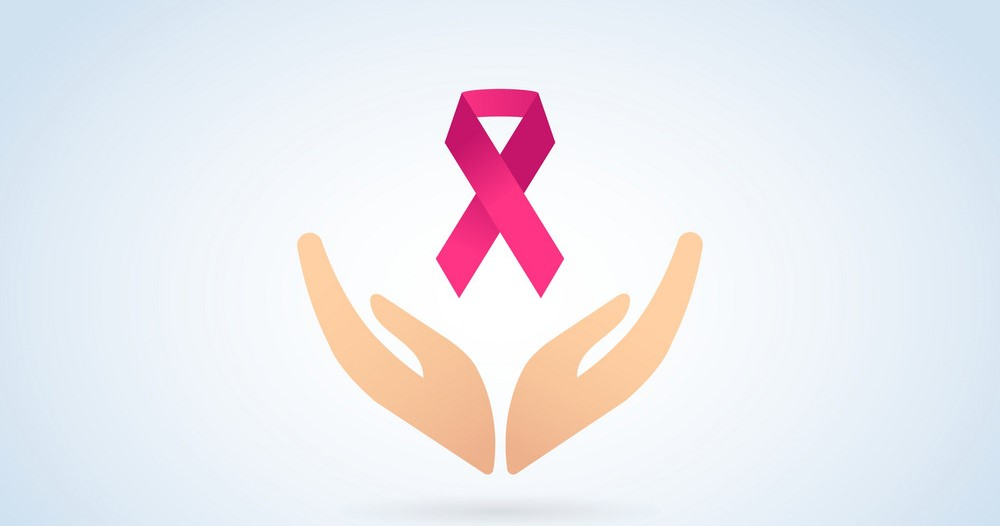

In [1]:
from IPython.display import display, Image
file_path = r'C:\Users\Vijay\Downloads\c1.jpg'
display(Image(filename=file_path, width=950, height=750))




<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:black; background-color:#dfa8e4; font-size: 16px; border-width: 2px; font-weight: bold;" data-toggle="popover"><span style="font-size: 20px;">AIM : </span>

- The aim of the project is to use NLP and Deep learning techniques to automatically classify medical
- documents related to cancer, leveraging a dataset of medical texts
- This allows the system to adapt to evolving medical knowledge and practices.

### The data is a collection of 7570 Rows and 3 column variables. Each row includes a written comment as well as additional customer information. Also each row corresponds to a customer review, and includes the variables:


<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:black; background-color:#dfa8e4; font-size: 16px; border-width: 2px; font-weight: bold;" data-toggle="popover"><span style="font-size: 20px;">Feature Information: </span>

- **1** - 0 :colon cancer=2579, lung cancer=2180, thyroid cancer=2810

- **2** - a:Text Data regarding Canser Health Canser Text Classification categoroial

<a id="2"></a>
## <p style="background-color:#B61151; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;"> LIBRARIES NEEDED IN THE STUDY<p>


In [2]:
#LIBRARIES NEEDED IN THE STUDY
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
import tensorflow as tf
import keras.models
#from keras.models import Sequential
from keras.layers import Conv2D , MaxPool2D ,Flatten , Dense, Dropout
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
from PIL import Image
from keras.models import Model, Sequential
from keras.layers import GlobalAveragePooling2D , BatchNormalization;
#from models import custom_convnet
from keras.layers import Embedding
from tensorflow.keras.layers import LSTM
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report
from keras.layers import Bidirectional
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding
from tensorflow.keras.optimizers import Adam





<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:black; background-color:#dfa8e4; font-size: 16px; border-width: 2px; font-weight: bold;" data-toggle="popover">
<span style="font-size: 20px;">NLP</span></a>

###  In a project context, you could succinctly define NLP as "the branch of artificial intelligence (AI)focused on enabling computers to understand,interpret, and generate human language."

<a id="3"></a>
## <p style="background-color:#B61151; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;"> Loading and Reading Data <p>

In [3]:
pd.read_csv(r"D:\Medical.csv",encoding='latin-1')

,Unnamed: 0,0,a
0,0,Thyroid_Cancer,Thyroid surgery in children in a single insti...
1,1,Thyroid_Cancer,""" The adopted strategy was the same as that us..."
2,2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...
3,3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...
4,4,Thyroid_Cancer,This study aimed to investigate serum matrix ...
...,...,...,...
7565,7565,Colon_Cancer,we report the case of a 24yearold man who pres...
7566,7566,Colon_Cancer,among synchronous colorectal cancers scrcs rep...
7567,7567,Colon_Cancer,the heterogeneity of cancer cells is generally...
7568,7568,Colon_Cancer,"""adipogenesis is the process through which mes..."


In [4]:
med=pd.read_csv(r"D:\Medical.csv",encoding='latin-1')

## <p style="background-color:#B61151; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;"> 

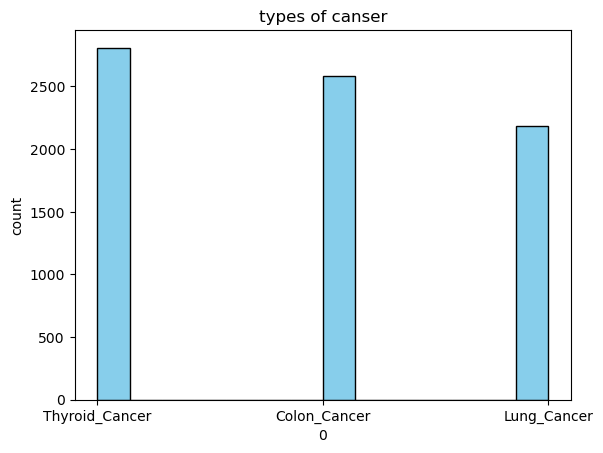

In [5]:
# Plot the histogram using matplotlib
plt.hist(med['0'], bins='auto', color='skyblue', edgecolor='black')

plt.xlabel('0')
plt.ylabel('count')
plt.title('types of canser')

plt.show()



<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:black; background-color:#dfa8e4; font-size: 16px; border-width: 2px; font-weight: bold;" data-toggle="popover">
<span style="font-size: 20px;">Data Analysis</span></a>


In [6]:
med.isnull().sum()>0

Unnamed: 0    False
0             False
a             False
dtype: bool

In [7]:
med=med.loc[:,['0','a']]

In [8]:
med

,0,a
0,Thyroid_Cancer,Thyroid surgery in children in a single insti...
1,Thyroid_Cancer,""" The adopted strategy was the same as that us..."
2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...
3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...
4,Thyroid_Cancer,This study aimed to investigate serum matrix ...
...,...,...
7565,Colon_Cancer,we report the case of a 24yearold man who pres...
7566,Colon_Cancer,among synchronous colorectal cancers scrcs rep...
7567,Colon_Cancer,the heterogeneity of cancer cells is generally...
7568,Colon_Cancer,"""adipogenesis is the process through which mes..."


In [9]:
med=med.rename(columns={'0':'y','a':'x'})

In [10]:
med

,y,x
0,Thyroid_Cancer,Thyroid surgery in children in a single insti...
1,Thyroid_Cancer,""" The adopted strategy was the same as that us..."
2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...
3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...
4,Thyroid_Cancer,This study aimed to investigate serum matrix ...
...,...,...
7565,Colon_Cancer,we report the case of a 24yearold man who pres...
7566,Colon_Cancer,among synchronous colorectal cancers scrcs rep...
7567,Colon_Cancer,the heterogeneity of cancer cells is generally...
7568,Colon_Cancer,"""adipogenesis is the process through which mes..."


In [11]:
med.y.value_counts()

Thyroid_Cancer    2810
Colon_Cancer      2580
Lung_Cancer       2180
Name: y, dtype: int64

In [12]:
med.head()

,y,x
0,Thyroid_Cancer,Thyroid surgery in children in a single insti...
1,Thyroid_Cancer,""" The adopted strategy was the same as that us..."
2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...
3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...
4,Thyroid_Cancer,This study aimed to investigate serum matrix ...


In [13]:
med=med.replace({'Thyroid_Cancer':0,'Colon_Cancer':1,'Lung_Cancer':2})

In [14]:
med

,y,x
0,0,Thyroid surgery in children in a single insti...
1,0,""" The adopted strategy was the same as that us..."
2,0,coronary arterybypass grafting thrombosis ï¬b...
3,0,Solitary plasmacytoma SP of the skull is an u...
4,0,This study aimed to investigate serum matrix ...
...,...,...
7565,1,we report the case of a 24yearold man who pres...
7566,1,among synchronous colorectal cancers scrcs rep...
7567,1,the heterogeneity of cancer cells is generally...
7568,1,"""adipogenesis is the process through which mes..."




<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:black; background-color:#dfa8e4; font-size: 16px; border-width: 2px; font-weight: bold;" data-toggle="popover">
<span style="font-size: 20px;">Lower String</span></a>


In [15]:
med.x=med.x.str.lower()
# before doing any analysis convert data into lower or upper

In [16]:
med.head()

,y,x
0,0,thyroid surgery in children in a single insti...
1,0,""" the adopted strategy was the same as that us..."
2,0,coronary arterybypass grafting thrombosis ï¬b...
3,0,solitary plasmacytoma sp of the skull is an u...
4,0,this study aimed to investigate serum matrix ...




<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:black; background-color:#dfa8e4; font-size: 16px; border-width: 2px; font-weight: bold;" data-toggle="popover">
<span style="font-size: 20px;">Stop words</span></a>


In [17]:
#Reduction of Dimensionality,Improved Performance,Reduced Noise,Better Interpretability

In [18]:
from nltk.corpus import stopwords
l1=stopwords.words("english")
# we remove them


<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:black; background-color:#dfa8e4; font-size: 16px; border-width: 2px; font-weight: bold;" data-toggle="popover">
<span style="font-size: 20px;">punctuation</span></a>


In [19]:
#Simplifying Tokenization,Normalization,Reducing Noise,Enhancing Interpretability

In [20]:
import string

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [21]:
def text_process(mess):
    """
    1. remove the punctuation
    2. remove the stopwords
    3. return the list of clean textwords
    
    """
    nopunc=[char for char in mess if char not in string.punctuation]
    nopunc="".join(nopunc)
    
    return [word for word in nopunc.split() if word not in l1]

In [22]:
med['x'].apply(text_process)

0       [thyroid, surgery, children, single, instituti...
1       [adopted, strategy, used, prior, years, based,...
2       [coronary, arterybypass, grafting, thrombosis,...
3       [solitary, plasmacytoma, sp, skull, uncommon, ...
4       [study, aimed, investigate, serum, matrix, met...
                              ...                        
7565    [report, case, 24yearold, man, presented, chie...
7566    [among, synchronous, colorectal, cancers, scrc...
7567    [heterogeneity, cancer, cells, generally, acce...
7568    [adipogenesis, process, mesenchymalstem, cells...
7569    [periparturient, period, one, challenging, per...
Name: x, Length: 7570, dtype: object



<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:black; background-color:#dfa8e4; font-size: 16px; border-width: 2px; font-weight: bold;" data-toggle="popover">
<span style="font-size: 20px;">Create TDM</span></a>


In [23]:
from sklearn.feature_extraction.text import CountVectorizer  # this is used to count each and every unique word...

In [24]:
import timeit
start=timeit.default_timer()

bow_transformer=CountVectorizer(analyzer=text_process).fit(med['x'])

stop=timeit.default_timer()
execution_time=stop-start
print("Program executed in ",execution_time)

Program executed in  54.19593729998451


In [25]:
bow_transformer=CountVectorizer(analyzer=text_process).fit(med['x'])

In [26]:
bow_transformer.vocabulary_

{'thyroid': 184741,
 'surgery': 175947,
 'children': 46891,
 'single': 168501,
 'institution': 98617,
 'osama': 136431,
 'ibrahim': 92838,
 'almosallama': 20757,
 'ali': 20228,
 'aseerib': 29353,
 'ahmed': 19380,
 'alhumaida': 20227,
 'alzahranic': 21414,
 'saif': 162107,
 'alsobhib': 21042,
 'saud': 162972,
 'alshanafeybfrom': 21011,
 'adepartment': 17640,
 'college': 50334,
 'medicine': 115868,
 'qassim': 152212,
 'university': 192186,
 'buraidah': 38772,
 'al': 19740,
 'saudi': 162975,
 'arabia': 28159,
 'bdepartment': 33374,
 'king': 104964,
 'faisal': 73922,
 'specialist': 170954,
 'hospital': 90004,
 'research': 157570,
 'center': 45364,
 'riyadh': 159726,
 'cdepartment': 44123,
 'correspondence': 53898,
 'dr': 64913,
 'almosallam': 20756,
 'department': 59660,
 'po': 145525,
 'box': 37574,
 'osamaiaahotmailcom': 136432,
 'orcid': 135793,
 'orcid0000000290367564': 135798,
 'citation': 48335,
 'oi': 134246,
 'aseeri': 29352,
 'alhumaid': 20226,
 'alzahrani': 21413,
 'alsobhi': 210

In [27]:
len(bow_transformer.vocabulary_)
# there are 208269 unique words after removing punctuation and stopwords
# that when we create our TDM our tdm will have 208269 columns

208269

In [28]:
tdm=bow_transformer.transform(med['x'])

In [29]:
tdm.shape

(7570, 208269)

In [30]:
type(tdm)

scipy.sparse._csr.csr_matrix


## <p style="background-color:#B61151; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;"> Pre-Processing Data  <p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:black; background-color:#dfa8e4; font-size: 16px; border-width: 2px; font-weight: bold;" data-toggle="popover">
    <span style="font-size: 20px;">Spliting Data into Train and Test</span>
</a>


In [31]:
# tdm is like our x variable 
from sklearn.model_selection import train_test_split
tdm_train,tdm_test,train_y,test_y=train_test_split(tdm,med['y'],test_size=.2)

train_y.shape

(6056,)

In [32]:
tdm_train.shape


(6056, 208269)


## <p style="background-color:#B61151; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;"> Naive Bayes  <p>
    
### In a project, you could describe Naive Bayes as "a simple probabilistic classifier based on Bayes' theorem with the assumption of independence between features."

In [33]:
from sklearn.naive_bayes import MultinomialNB

nb=MultinomialNB()
nb.fit(tdm_train,train_y)

MultinomialNB()

In [34]:
pred_nb=nb.predict(tdm_test)

In [35]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [36]:
tab_nb=confusion_matrix(test_y,pred_nb)
tab_nb

array([[516,  50,   0],
       [ 44, 461,   0],
       [  0,   0, 443]], dtype=int64)

In [37]:
accuracy_score(test_y,pred_nb)

0.9379128137384413

In [38]:
print(classification_report(test_y,pred_nb))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92       566
           1       0.90      0.91      0.91       505
           2       1.00      1.00      1.00       443

    accuracy                           0.94      1514
   macro avg       0.94      0.94      0.94      1514
weighted avg       0.94      0.94      0.94      1514




<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:black; background-color:#dfa8e4; font-size: 16px; border-width: 2px; font-weight: bold;" data-toggle="popover">
    <span style="font-size: 20px;"> Most Frequent Words from all data</span>

In [39]:
import matplotlib.pyplot as plt

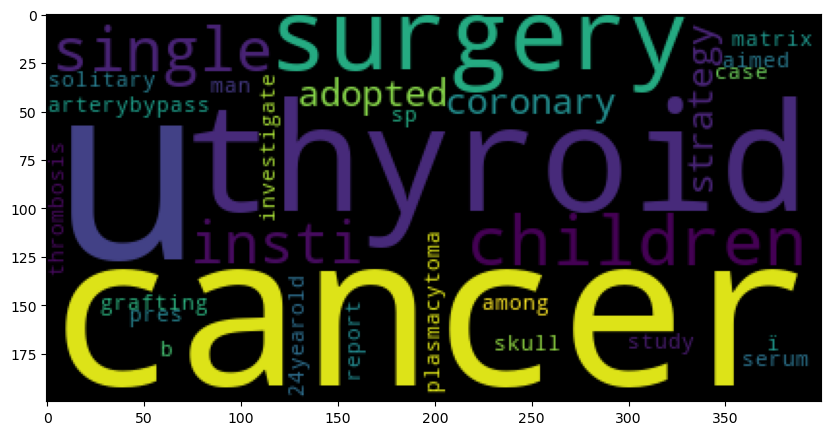

In [40]:
from wordcloud import WordCloud
cloud=WordCloud(stopwords=stopwords.words('english'),max_words=30).generate(str(med['x']))
plt.figure(figsize=(10,10))
plt.imshow(cloud)



<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:black; background-color:#dfa8e4; font-size: 16px; border-width: 2px; font-weight: bold;" data-toggle="popover">
    <span style="font-size: 20px;">Most Frequent Words from class 0 -->Thyroid_Cancer</span>

In [41]:
med_spam_df0=med[med.y==0]

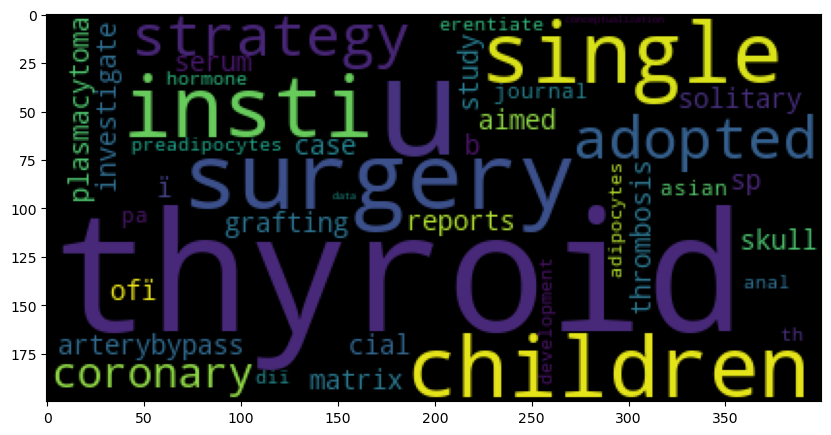

In [42]:
from wordcloud import WordCloud
cloud=WordCloud(stopwords=stopwords.words('english'),max_words=40).generate(str(med_spam_df0['x']))
plt.figure(figsize=(10,10))
plt.imshow(cloud)

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:black; background-color:#dfa8e4; font-size: 16px; border-width: 2px; font-weight: bold;" data-toggle="popover">
    <span style="font-size: 20px;">Most Frequent Words from class 1 -->Colon_Cancer</span>

In [43]:
med_spam_df1=med[med.y==1]

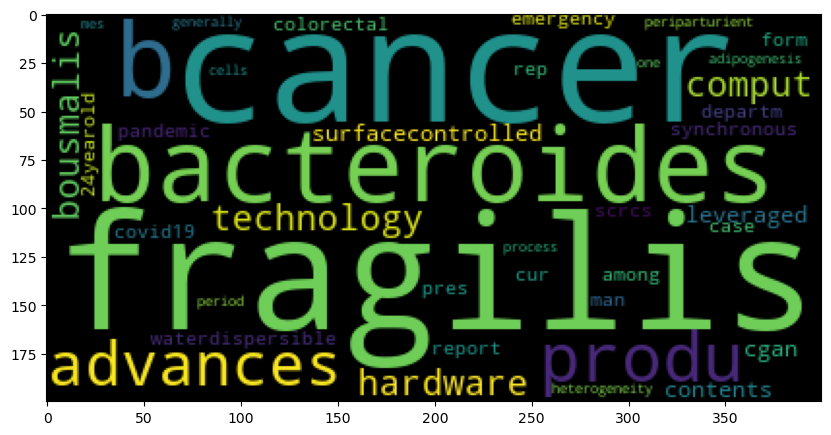

In [44]:
cloud=WordCloud(stopwords=stopwords.words('english'),max_words=40).generate(str(med_spam_df1['x']))
plt.figure(figsize=(10,10))
plt.imshow(cloud)


<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:black; background-color:#dfa8e4; font-size: 16px; border-width: 2px; font-weight: bold;" data-toggle="popover">
    <span style="font-size: 20px;">Most Frequent Words from class 2 --> Lung_Cancer</span>

In [45]:
med_spam_df2=med[med.y==2]

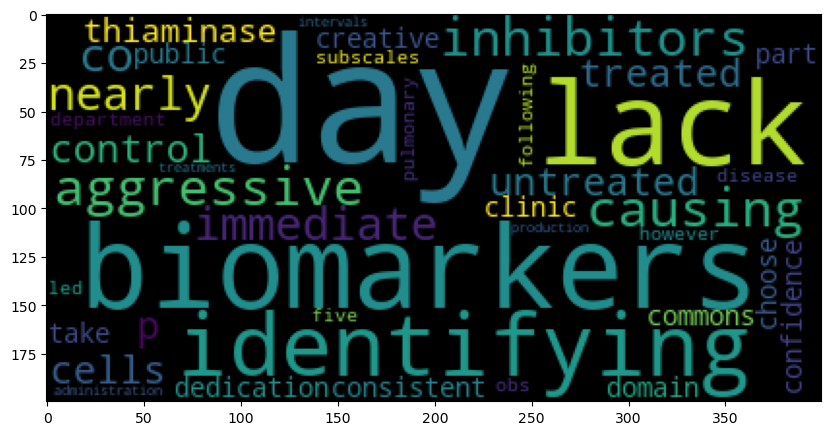

In [46]:
cloud=WordCloud(stopwords=stopwords.words('english'),max_words=40).generate(str(med_spam_df2['x']))
plt.figure(figsize=(10,10))
plt.imshow(cloud)

## <p style="background-color:#B61151; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">RNN  <p> 
### "RNNs are a type of neural network architecture designed to effectively process sequential data by retaining information about previous inputs. They achieve this by incorporating loops within their structure, allowing them to maintain a memory of past information while processing new input. This makes RNNs particularly suitablefor tasks such as time series prediction, natural language processing, and sequence generation.

In [112]:
pd.read_csv(r"D:\Medical.csv",encoding='latin-1')

,Unnamed: 0,0,a
0,0,Thyroid_Cancer,Thyroid surgery in children in a single insti...
1,1,Thyroid_Cancer,""" The adopted strategy was the same as that us..."
2,2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...
3,3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...
4,4,Thyroid_Cancer,This study aimed to investigate serum matrix ...
...,...,...,...
7565,7565,Colon_Cancer,we report the case of a 24yearold man who pres...
7566,7566,Colon_Cancer,among synchronous colorectal cancers scrcs rep...
7567,7567,Colon_Cancer,the heterogeneity of cancer cells is generally...
7568,7568,Colon_Cancer,"""adipogenesis is the process through which mes..."


In [113]:
med=pd.read_csv(r"D:\Medical.csv",encoding='latin-1')

In [114]:
df=pd.DataFrame(med['0'])

In [115]:
df['x']=med['a']

In [116]:
df.rename(columns={'0':'y'},inplace=True)

In [117]:
df.y=df.y.replace({'Thyroid_Cancer':0,'Colon_Cancer':1,'Lung_Cancer':2})


In [118]:
df.head()

,y,x
0,0,Thyroid surgery in children in a single insti...
1,0,""" The adopted strategy was the same as that us..."
2,0,coronary arterybypass grafting thrombosis ï¬b...
3,0,Solitary plasmacytoma SP of the skull is an u...
4,0,This study aimed to investigate serum matrix ...


In [119]:
df.y.nunique()

3

In [120]:
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:black; background-color:#dfa8e4; font-size: 16px; border-width: 2px; font-weight: bold;" data-toggle="popover">
    <span style="font-size: 20px;">Spliting Data into Train and Test</span>
</a>

In [121]:
df_x=df.iloc[:,1]
df_y=df.iloc[:,0]
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(df_x,df_y,test_size=.2)

In [122]:
from tensorflow.keras.utils import to_categorical

# Assuming y_train and y_test are your class labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [123]:
max_num_words=8000 #from entire corpus sleect 10000 words
seq_len=100 # how many words out of 10000 you wish to take from each document
embedding_size=100 #vector length of each word

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:black; background-color:#dfa8e4; font-size: 16px; border-width: 2px; font-weight: bold;" data-toggle="popover">
    <span style="font-size: 20px;">Sampling</span>
</a>

In [124]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [125]:
tokenizer=Tokenizer(num_words=max_num_words)
tokenizer.fit_on_texts(df.x)
x_train=tokenizer.texts_to_sequences(x_train)
x_test=tokenizer.texts_to_sequences(x_test)

In [126]:
x_train=pad_sequences(x_train,maxlen=seq_len)
x_test=pad_sequences(x_test,maxlen=seq_len)

model=Sequential()
model.add(Embedding(input_dim=max_num_words,
                   input_length=seq_len,
                   output_dim=embedding_size))

In [127]:
model.add(SimpleRNN(128))
#model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))

from tensorflow.keras.optimizers import Adam
adam=Adam(learning_rate=.001)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:black; background-color:#dfa8e4; font-size: 16px; border-width: 2px; font-weight: bold;" data-toggle="popover">
    <span style="font-size: 20px;">Fit The Model</span>
</a>

In [128]:
model.fit(x_train,y_train,epochs=8,batch_size=32,validation_split=.2)

Epoch 1/8
152/152 [==============================] - 3s 17ms/step - loss: 0.4641 - accuracy: 0.8208 - val_loss: 0.0879 - val_accuracy: 0.9794
Epoch 2/8
152/152 [==============================] - 2s 16ms/step - loss: 0.0417 - accuracy: 0.9884 - val_loss: 0.0521 - val_accuracy: 0.9884
Epoch 3/8
152/152 [==============================] - 2s 16ms/step - loss: 0.0361 - accuracy: 0.9874 - val_loss: 0.0421 - val_accuracy: 0.9769
Epoch 4/8
152/152 [==============================] - 2s 16ms/step - loss: 0.0936 - accuracy: 0.9649 - val_loss: 0.5932 - val_accuracy: 0.7492
Epoch 5/8
152/152 [==============================] - 2s 16ms/step - loss: 0.1322 - accuracy: 0.9577 - val_loss: 0.0777 - val_accuracy: 0.9653
Epoch 6/8
152/152 [==============================] - 2s 16ms/step - loss: 0.0435 - accuracy: 0.9822 - val_loss: 0.0471 - val_accuracy: 0.9851
Epoch 7/8
152/152 [==============================] - 2s 16ms/step - loss: 0.0286 - accuracy: 0.9855 - val_loss: 0.0356 - val_accuracy: 0.9810
Epoch 

In [129]:
pred_prob=model.predict(x_test)

48/48 [==============================] - 0s 5ms/step


In [130]:
pred=pred_prob.argmax(axis=1)

In [131]:
y_test=y_test.argmax(axis=1)

In [132]:
confusion_matrix(y_test,pred)

array([[559,  12,   0],
       [  3, 503,   0],
       [  1,   0, 436]], dtype=int64)

In [133]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       571
           1       0.98      0.99      0.99       506
           2       1.00      1.00      1.00       437

    accuracy                           0.99      1514
   macro avg       0.99      0.99      0.99      1514
weighted avg       0.99      0.99      0.99      1514



In [134]:
accuracy_score(y_test,pred)

0.9894319682959049

## <p style="background-color:#B61151; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">LSTM  <p> 
    
### "LSTM networks are a type of recurrent neural network (RNN) architecture designed to address the vanishing gradient problem and capture long-term dependencies in sequential data. They achieve this by introducing specialized memory cells with gating mechanisms, allowing them to selectively retain and update information over multiple time steps. This enables LSTMs to effectively model complex sequential patterns, making themwell-suited for tasks such as speech recognition, language translation, and time series forecasting."    
    
    

In [70]:
pd.read_csv(r"D:\Medical.csv",encoding='latin-1')

,Unnamed: 0,0,a
0,0,Thyroid_Cancer,Thyroid surgery in children in a single insti...
1,1,Thyroid_Cancer,""" The adopted strategy was the same as that us..."
2,2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...
3,3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...
4,4,Thyroid_Cancer,This study aimed to investigate serum matrix ...
...,...,...,...
7565,7565,Colon_Cancer,we report the case of a 24yearold man who pres...
7566,7566,Colon_Cancer,among synchronous colorectal cancers scrcs rep...
7567,7567,Colon_Cancer,the heterogeneity of cancer cells is generally...
7568,7568,Colon_Cancer,"""adipogenesis is the process through which mes..."


In [71]:
med=pd.read_csv(r"D:\Medical.csv",encoding='latin-1')

In [72]:
df=pd.DataFrame(med['0'])

In [73]:
df['x']=med['a']

In [74]:
df.rename(columns={'0':'y'},inplace=True)

In [75]:
df.y=df.y.replace({'Thyroid_Cancer':0,'Colon_Cancer':1,'Lung_Cancer':2})


In [76]:
df.head()

,y,x
0,0,Thyroid surgery in children in a single insti...
1,0,""" The adopted strategy was the same as that us..."
2,0,coronary arterybypass grafting thrombosis ï¬b...
3,0,Solitary plasmacytoma SP of the skull is an u...
4,0,This study aimed to investigate serum matrix ...


In [77]:
df.y.nunique()

3

In [78]:
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:black; background-color:#dfa8e4; font-size: 16px; border-width: 2px; font-weight: bold;" data-toggle="popover">
    <span style="font-size: 20px;">Spliting Data into Train and Test</span>
</a>

In [79]:
df_x=df.iloc[:,1]
df_y=df.iloc[:,0]
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(df_x,df_y,test_size=.2)

In [80]:
from tensorflow.keras.utils import to_categorical

# Assuming y_train and y_test are your class labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [81]:
max_num_words=8000 #from entire corpus sleect 10000 words
seq_len=100 # how many words out of 10000 you wish to take from each document
embedding_size=100 #vector length of each word

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:black; background-color:#dfa8e4; font-size: 16px; border-width: 2px; font-weight: bold;" data-toggle="popover">
    <span style="font-size: 20px;">Sampling</span>
</a>

In [82]:
tokenizer=Tokenizer(num_words=max_num_words)
tokenizer.fit_on_texts(df.x)
x_train=tokenizer.texts_to_sequences(x_train)
x_test=tokenizer.texts_to_sequences(x_test)

In [83]:
x_train=pad_sequences(x_train,maxlen=seq_len)
x_test=pad_sequences(x_test,maxlen=seq_len)

model=Sequential()
model.add(Embedding(input_dim=max_num_words,
                   input_length=seq_len,
                   output_dim=embedding_size))

In [84]:
model.add(LSTM(128))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))

from tensorflow.keras.optimizers import Adam
adam=Adam(learning_rate=.001)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:black; background-color:#dfa8e4; font-size: 16px; border-width: 2px; font-weight: bold;" data-toggle="popover">
    <span style="font-size: 20px;">Fit The Model</span>
</a>

In [85]:
model.fit(x_train,y_train,epochs=8,batch_size=32,validation_split=.2)

Epoch 1/8
152/152 [==============================] - 8s 41ms/step - loss: 0.5686 - accuracy: 0.7320 - val_loss: 0.1745 - val_accuracy: 0.9563
Epoch 2/8
152/152 [==============================] - 6s 39ms/step - loss: 0.0766 - accuracy: 0.9699 - val_loss: 0.0703 - val_accuracy: 0.9769
Epoch 3/8
152/152 [==============================] - 7s 45ms/step - loss: 0.0539 - accuracy: 0.9767 - val_loss: 0.0561 - val_accuracy: 0.9752
Epoch 4/8
152/152 [==============================] - 7s 49ms/step - loss: 0.0467 - accuracy: 0.9779 - val_loss: 0.0568 - val_accuracy: 0.9769
Epoch 5/8
152/152 [==============================] - 7s 45ms/step - loss: 0.0483 - accuracy: 0.9773 - val_loss: 0.0346 - val_accuracy: 0.9802
Epoch 6/8
152/152 [==============================] - 7s 43ms/step - loss: 0.0356 - accuracy: 0.9802 - val_loss: 0.0458 - val_accuracy: 0.9794
Epoch 7/8
152/152 [==============================] - 7s 43ms/step - loss: 0.0355 - accuracy: 0.9816 - val_loss: 0.0256 - val_accuracy: 0.9843
Epoch 

In [86]:
pred_prob=model.predict(x_test)

48/48 [==============================] - 1s 13ms/step


In [87]:
pred=pred_prob.argmax(axis=1)

In [88]:
y_test=y_test.argmax(axis=1)

In [89]:
confusion_matrix(y_test,pred)

array([[543,   8,   0],
       [ 24, 503,   0],
       [  0,   0, 436]], dtype=int64)

In [90]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       551
           1       0.98      0.95      0.97       527
           2       1.00      1.00      1.00       436

    accuracy                           0.98      1514
   macro avg       0.98      0.98      0.98      1514
weighted avg       0.98      0.98      0.98      1514



In [91]:
accuracy_score(y_test,pred)

0.9788639365918098


## <p style="background-color:#B61151; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">Bidirection LSTM  <p> 
### BiLSTM networks extend the capabilities of traditional LSTMs by processing input sequences in both forward and backward directions. This allows them to capture context from past and future inputs simultaneously, enhancing their ability to understand and model complex dependencies in sequential data. BiLSTMs areparticularly effective for tasks such as sequence labeling, sentiment analysis, and machine translation, where bidirectional context is crucial for accurate prediction."

In [92]:
pd.read_csv(r"D:\Medical.csv",encoding='latin-1')

,Unnamed: 0,0,a
0,0,Thyroid_Cancer,Thyroid surgery in children in a single insti...
1,1,Thyroid_Cancer,""" The adopted strategy was the same as that us..."
2,2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...
3,3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...
4,4,Thyroid_Cancer,This study aimed to investigate serum matrix ...
...,...,...,...
7565,7565,Colon_Cancer,we report the case of a 24yearold man who pres...
7566,7566,Colon_Cancer,among synchronous colorectal cancers scrcs rep...
7567,7567,Colon_Cancer,the heterogeneity of cancer cells is generally...
7568,7568,Colon_Cancer,"""adipogenesis is the process through which mes..."


In [93]:
med=pd.read_csv(r"D:\Medical.csv",encoding='latin-1')

In [94]:
med=med.loc[:,['0','a']]

In [95]:
med=med.rename(columns={'0':'y','a':'x'})


In [96]:
med=med.replace({'Thyroid_Cancer':0,'Colon_Cancer':1,'Lung_Cancer':2})
med.head()


,y,x
0,0,Thyroid surgery in children in a single insti...
1,0,""" The adopted strategy was the same as that us..."
2,0,coronary arterybypass grafting thrombosis ï¬b...
3,0,Solitary plasmacytoma SP of the skull is an u...
4,0,This study aimed to investigate serum matrix ...


<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:black; background-color:#dfa8e4; font-size: 16px; border-width: 2px; font-weight: bold;" data-toggle="popover">
    <span style="font-size: 20px;">Spliting Data into Train and Test</span>
</a>

In [97]:
med_x =  med.iloc[:,1]
med_y = med.iloc[:,0]
from sklearn.model_selection import train_test_split


In [98]:
x_train, x_test, y_train, y_test = train_test_split(med_x, med_y, test_size=.2)


In [99]:
y_train = to_categorical(y_train) # one hot endcoding


In [100]:
max_num_words = 8000      # from the entire corpus select 10000 words
seq_len = 100               # how many words out of 10000 you wish to take from each document
embeddings_size = 100      # vector length of each word


<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:black; background-color:#dfa8e4; font-size: 16px; border-width: 2px; font-weight: bold;" data-toggle="popover">
    <span style="font-size: 20px;">Sampling</span>
</a>

In [101]:
tokenizer = Tokenizer(num_words = max_num_words)# word to num
tokenizer.fit_on_texts(med.x)
x_train = tokenizer.texts_to_sequences(x_train)

x_test = tokenizer.texts_to_sequences(x_test)

x_train = pad_sequences(x_train, maxlen=seq_len)


x_test = pad_sequences(x_test, maxlen=seq_len)


In [102]:
model = Sequential() # initialize the network
model.add(Embedding(input_dim= max_num_words,
                   input_length= seq_len,
                   output_dim = embeddings_size))


In [103]:
model.add(Bidirectional(LSTM(65)))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))# Dense 3


In [104]:
from tensorflow.keras.optimizers import Adam
adam = Adam(learning_rate = .001)
model.compile(optimizer='adam', loss ='categorical_crossentropy', metrics =['accuracy'])


<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:black; background-color:#dfa8e4; font-size: 16px; border-width: 2px; font-weight: bold;" data-toggle="popover">
    <span style="font-size: 20px;">Fit The Model</span>
</a>

In [105]:
model.fit(x_train, y_train, epochs = 5, batch_size = 32, validation_split=.2)

Epoch 1/5
152/152 [==============================] - 8s 37ms/step - loss: 0.5862 - accuracy: 0.7238 - val_loss: 0.1353 - val_accuracy: 0.9546
Epoch 2/5
152/152 [==============================] - 5s 34ms/step - loss: 0.0779 - accuracy: 0.9752 - val_loss: 0.0665 - val_accuracy: 0.9728
Epoch 3/5
152/152 [==============================] - 5s 34ms/step - loss: 0.0401 - accuracy: 0.9845 - val_loss: 0.0285 - val_accuracy: 0.9884
Epoch 4/5
152/152 [==============================] - 6s 38ms/step - loss: 0.0351 - accuracy: 0.9870 - val_loss: 0.0346 - val_accuracy: 0.9893
Epoch 5/5
152/152 [==============================] - 6s 41ms/step - loss: 0.0431 - accuracy: 0.9853 - val_loss: 0.0302 - val_accuracy: 0.9884


In [106]:
pred=model.predict(x_test)
pred


48/48 [==============================] - 1s 10ms/step


array([[9.9330091e-01, 6.5751732e-03, 1.2382996e-04],
       [1.1717934e-01, 8.8201433e-01, 8.0633163e-04],
       [1.3447463e-03, 9.9844617e-01, 2.0910660e-04],
       ...,
       [5.0892815e-04, 2.3278006e-04, 9.9925834e-01],
       [9.9552011e-01, 4.4396310e-03, 4.0242372e-05],
       [3.5268647e-04, 1.5554483e-04, 9.9949181e-01]], dtype=float32)

In [107]:
pred_classes=pred.argmax(axis=1)


In [108]:
from sklearn.metrics import confusion_matrix,accuracy_score


In [109]:
tab=confusion_matrix(y_test,pred_classes)
tab


array([[566,   7,   0],
       [ 17, 484,   0],
       [  0,   0, 440]], dtype=int64)

In [110]:
accuracy_score(y_test,pred_classes)

0.9841479524438573

# Compression of Models

In [111]:

l1=('Naive Bayes ','RNN','LSTM','Bidirection LSTM')
l2=(92.73,96.43,98.41,98.48)

importances=pd.DataFrame()
importances['Models']=l1
importances['Accuracy']=l2

importances

,Models,Accuracy
0,Naive Bayes,92.73
1,RNN,96.43
2,LSTM,98.41
3,Bidirection LSTM,98.48


# CONCLUSION
- **Analyzing and classifying these types of text data can provide valuable insights for
healthcare professionals, researchers, and patients, facilitating better understanding, diagnosis,
treatment, and management of cancer.
-->Thyroid_Cancer,Colon_Cancer,Lung_Cance**

<p style="background-color:purple; font-family:newtimeroman; color:#FFF9ED; font-size:200%; text-align:center; border-radius:20px; padding:20px;"><strong>Thank You :)</strong></p>
